# Exploratory Data Analysis (EDA)
Use the dataset(s) provided to do some exploratory analysis - which is not expected to be exhaustive; it only needs to demonstrate some comfort level doing some interesting analysis and presenting findings

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import sys
import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Useful parameters
DATA_DIR = 'datasets/'
prod_estimates_dataset = 'PRODUCTION ESTIMATES.csv'
wholesale_prices_dataset = 'NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv'
rainfall_dataset = 'RAINFALL.csv'
path_to_prod_est_dataset = os.path.join(DATA_DIR, prod_estimates_dataset)
path_to_ws_prices_dataset = os.path.join(DATA_DIR, wholesale_prices_dataset)
path_to_rainfall_dataset = os.path.join(DATA_DIR, rainfall_dataset)
print('Production estimates dataset is found in:', path_to_prod_est_dataset)
print('Wholesale prices dataset is found in:', path_to_ws_prices_dataset)
print('Rainfall dataset is found in:', path_to_rainfall_dataset)

Production estimates dataset is found in: datasets/PRODUCTION ESTIMATES.csv
Wholesale prices dataset is found in: datasets/NATIONAL WHOLESALE PRICE OF SOME SELECTED COMMODITIES.csv
Rainfall dataset is found in: datasets/RAINFALL.csv


In [3]:
# Load Production Estimates DataFrame
pro_est_df = pd.read_csv(path_to_prod_est_dataset)
pro_est_df.head(3)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,WESTERN,SHAMA AHANTA EAST,2008,MAIZE,1099.0,1.15,1263.85
1,WESTERN,WEST AHANTA,2008,MAIZE,1433.0,1.19,1705.27
2,WESTERN,MPORHOR WASSA EAST,2008,MAIZE,2034.0,1.32,2684.88


In [4]:
# Load National Price DataFrame
ws_price_df = pd.read_csv(path_to_ws_prices_dataset, encoding = "ISO-8859-1", engine='python')
ws_price_df.head(3)

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043


In [5]:
# Load Rainfall DataFrame
rainfall_df = pd.read_csv(path_to_rainfall_dataset)
rainfall_df.head(3)

,YEAR,REGION,TOTAL RAINFALL(MM)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914


# Production Estimates DataFrame Analysis

In [6]:
# Accessing Production Estimates DataFrame
pro_est_df.head(3)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,WESTERN,SHAMA AHANTA EAST,2008,MAIZE,1099.0,1.15,1263.85
1,WESTERN,WEST AHANTA,2008,MAIZE,1433.0,1.19,1705.27
2,WESTERN,MPORHOR WASSA EAST,2008,MAIZE,2034.0,1.32,2684.88


The Production Estimates DataFrame has seven columns. Five contain non-null values; however, two contain null-values. We will access these null values and see how to impute them soon.Also, the **Yield** and **Production** columns are of object data types instead of the numeric columns. We will investigate that and change these object column types to numeric.

In [7]:
# Production Estimates DataFrame columns inforamtion
pro_est_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           8236 non-null   object 
 1   DISTRICT         8236 non-null   object 
 2   YEAR             8236 non-null   int64  
 3   CROP             8236 non-null   object 
 4   AREA (HA)        8236 non-null   float64
 5   YIELD (MT/HA)    8220 non-null   object 
 6   PRODUCTION (MT)  8234 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 450.5+ KB


In [8]:
# Accessing Production Estimates column names
pro_est_df.columns

Index(['REGION', 'DISTRICT', 'YEAR', 'CROP', 'AREA (HA)', 'YIELD (MT/HA)',
       'PRODUCTION (MT)'],
      dtype='object')

In [9]:
# Accessing null values to see their nature
pro_est_df.loc[pro_est_df.isnull().any(axis=1)].tail()

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
6483,EASTERN,FANTEAKWA,2016,RICE,23.07,NaN,-
6579,EASTERN,KWAHU EAST,2016,COWPEA,16.53,NaN,-
7762,CENTRAL,AGONA EAST,2017,COCOYAM,65.00,NaN,-
8120,ASHANTI,SEKYERE SOUTH,2017,COWPEA,41.00,-,NaN
8121,ASHANTI,AFIGYA KWABRE,2017,COWPEA,33.00,-,NaN


The production estimates dataframe has 8326 rows, of which 18 are null values. **Also some rows have no data recorded and have " - " rather recorded**. It is assumed Production did not take place in such districts as such their **Production columns** will be imputed with zero; same for their **Yield**.

In [10]:
# Replacing null values with zero
pro_est_df = pro_est_df.fillna(0)

Upon accessment, the **Production and Yield columns** contain _" -   ", " - " and "                           -    "_ values. We will also impute these values with zero.

In [11]:
# Replacing non-recorded rows with zeros
pro_est_df = pro_est_df.replace(" -   ", 0)

In [12]:
# Replacing non-recorded rows with zeros
pro_est_df = pro_est_df.replace(" - ", 0)

In [13]:
# Replacing non-recorded rows with zeros
pro_est_df = pro_est_df.replace("                           -    ", 0)

In [14]:
# Verifying if null-values have been replaced
pro_est_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           8236 non-null   object 
 1   DISTRICT         8236 non-null   object 
 2   YEAR             8236 non-null   int64  
 3   CROP             8236 non-null   object 
 4   AREA (HA)        8236 non-null   float64
 5   YIELD (MT/HA)    8236 non-null   object 
 6   PRODUCTION (MT)  8236 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 450.5+ KB


In [15]:
# Converting Area column to a numeric column
pro_est_df['AREA (HA)'] = pd.to_numeric(pro_est_df['AREA (HA)'])

In [16]:
# Converting Yield column to a numeric column
pro_est_df['YIELD (MT/HA)'] = pd.to_numeric(pro_est_df['YIELD (MT/HA)'])

In [17]:
# Converting Production column to a numeric column
pro_est_df['PRODUCTION (MT)'] = pd.to_numeric(pro_est_df['PRODUCTION (MT)'])

In [18]:
pro_est_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REGION           8236 non-null   object 
 1   DISTRICT         8236 non-null   object 
 2   YEAR             8236 non-null   int64  
 3   CROP             8236 non-null   object 
 4   AREA (HA)        8236 non-null   float64
 5   YIELD (MT/HA)    8236 non-null   float64
 6   PRODUCTION (MT)  8236 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 450.5+ KB


In [19]:
# Accessing the Production Estimates DataFrame correlation
pro_est_df.corr()

,YEAR,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
YEAR,1.000000,-0.115683,0.059953,-0.013695
AREA (HA),-0.115683,1.000000,0.140375,0.574871
YIELD (MT/HA),0.059953,0.140375,1.000000,0.652473
PRODUCTION (MT),-0.013695,0.574871,0.652473,1.000000


After accessing the Production Estimates DataFrame profile, we can see quite a high correlation between the **REGION, CROP, AREA, YIELD and PRODUCTION** columns. We will have a closer look at them later in the analysis. For now, let's access the statistical information of the various columns to have a good idea of what they represent.

In [20]:
# Accessing statistical information
pro_est_df.describe()

,YEAR,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
count,8236.000000,8236.000000,8236.000000,8.236000e+03
mean,2012.969888,3996.539373,6.961456,3.265124e+04
std,2.864953,4868.861002,6.576048,6.558999e+04
min,2008.000000,0.020000,0.000000,0.000000e+00
25%,2011.000000,540.000000,1.440000,1.782000e+03
50%,2013.000000,2308.445000,4.600000,7.477235e+03
75%,2016.000000,5860.000000,10.900000,2.956623e+04
max,2017.000000,54300.000000,42.450000,1.241400e+06


## UNIVARIATE Analysis
To start our analysis on the Production Estimates DataFrame, we will first do **univariate analysis** before we move to **multivariate analysis**.

### CROP  Analysis

In [21]:
# Accessing distinct value counts
pro_est_df.CROP.value_counts()

MAIZE        1328
CASSAVA      1184
YAM          1133
PLANTAIN     1061
RICE         1036
COCOYAM       994
COWPEA        434
GROUNDNUT     344
SORGHUM       262
SOYABEAN      208
MILLET        182
MAIZE          41
RICE           29
Name: CROP, dtype: int64

In [22]:
pro_est_df.CROP.unique()

array(['MAIZE', 'RICE', 'CASSAVA', 'YAM', 'SOYABEAN', 'COCOYAM',
       'PLANTAIN', 'SORGHUM', 'GROUNDNUT', 'MILLET', 'COWPEA', 'MAIZE ',
       'RICE '], dtype=object)

**Maize** and **Rice** were mispelt as we can see from the value counts above. As such, we will replace the mispelt ones with the right names to get the right value counts before we continue with our analysis.

In [23]:
# Verifying length of mispelled Rice-value columns
len(pro_est_df.loc[pro_est_df['CROP'] == 'RICE '])

29

In [24]:
# Verifying length of mispelled Maize-value columns
len(pro_est_df.loc[pro_est_df['CROP'] == 'MAIZE '])

41

In [25]:
# Replacing mispelled names with correct names
cleanup_cats = {"CROP": {"RICE ": 'RICE', "MAIZE ": "MAIZE"}}
pro_est_df = pro_est_df.replace(cleanup_cats)

In [26]:
pro_est_df.CROP.value_counts()

MAIZE        1369
CASSAVA      1184
YAM          1133
RICE         1065
PLANTAIN     1061
COCOYAM       994
COWPEA        434
GROUNDNUT     344
SORGHUM       262
SOYABEAN      208
MILLET        182
Name: CROP, dtype: int64

### DISTRICT  Analysis

In [27]:
# Accessing REGION valuecounts
pro_est_df.DISTRICT.value_counts()

KRACHI WEST                        84
KWAHU WEST                         81
WA MUNICIPAL                       80
NADOWLI                            80
SISSALA WEST                       80
                                   ..
LANKWANTANAN MUNICIPAL ASSEMBLY     2
GA CENTRAL                          2
GA SOUTH                            2
TEMA METROPOLITAN ASSEMBLY          1
ACCRA METROPOLITAN ASSEMBLY         1
Name: DISTRICT, Length: 292, dtype: int64

In total, there are 292 districts. The Krachi West district has the highest record observations(84). The Accra Metropolitan Assembly and The Tema Metropolitan Assembly have only one observations each, of which we will analyze later in this exercise.

In [28]:
# len(pro_est_df.DISTRICT.value_counts()[:40])

In [29]:
pro_est_df.columns

Index(['REGION', 'DISTRICT', 'YEAR', 'CROP', 'AREA (HA)', 'YIELD (MT/HA)',
       'PRODUCTION (MT)'],
      dtype='object')

### REGION  Analysis

In [30]:
# Accessing REGION valuecounts
pro_est_df.REGION.value_counts()

ASHANTI            1635
BRONG AHAFO        1254
EASTERN            1203
WESTERN             971
VOLTA               965
CENTRAL             756
UPPER WEST          707
UPPER EAST          637
NORTHERN REGION      78
GREATER ACCRA        30
Name: REGION, dtype: int64

We can see there are ten regions were data were recorded

### YEAR  Analysis

In [31]:
# Accessing distinct value counts
pro_est_df.YEAR.value_counts()

2017    1147
2016     923
2015     870
2013     868
2014     867
2012     856
2011     705
2010     702
2009     650
2008     648
Name: YEAR, dtype: int64

In [32]:
pro_est_df.YEAR.min()

2008

In [33]:
pro_est_df.YEAR.max()

2017

We can see data was recorded from 2008 to 2017; recorded values slowly progress as we move to 2017. Does that mean Production increase with time? We will find out soon.

In [34]:
# Getting the list of years and production counts with respect to yeas
# We will take out columns we imputed with zero to get the right production count with respect to years
years = []
year_count = []
non_zero_pro_est_df = pro_est_df.loc[(pro_est_df['PRODUCTION (MT)'] != 0) & (pro_est_df['YIELD (MT/HA)'] != 0)]
for year in non_zero_pro_est_df['YEAR'].unique():
    years.append(year)
for count in np.array(non_zero_pro_est_df['YEAR'].value_counts()):
    year_count.append(count)

In [35]:
# We need to reverse the year list to get the right graph
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

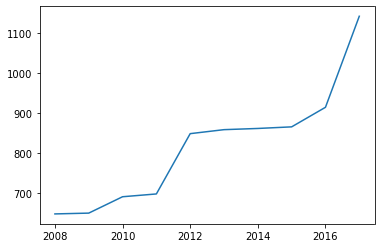

In [36]:
plt.plot(sorted(years, reverse = True), year_count)

### AREA  Analysis

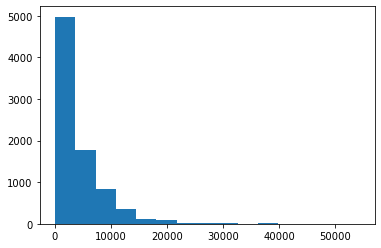

In [37]:
# Plotting the distribution to have a good understanding of the AREA column
plt.hist(pro_est_df['AREA (HA)'], bins = 15)
plt.show()

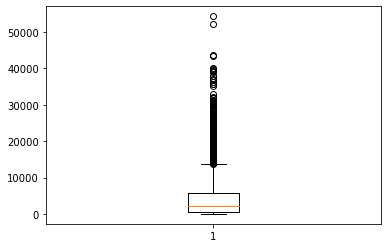

In [38]:
# Plotting the bloxplot to have a good understanding of the AREA column
plt.boxplot(pro_est_df['AREA (HA)'])
plt.show()

We can see from the histogram and bloxplot above that the **AREA** column is right-skewed with quite a number of outliers. Let's find out in numbers how many fall below the median and how many are outliers. We want to avoid making analysis with the mean here because the data is skewed and as such will not give the right assessment of the **AREA** column.

In [39]:
# Useful parameters
area_first_quartile = 540
area_second_quartile = 2308.445
area_third_quartile = 5860
area_mean = 3996.539373
area_IQR = area_third_quartile - area_first_quartile
area_outlier_range = area_third_quartile + (1.5 * area_IQR)
print(area_outlier_range)

13840.0


In [40]:
# Accessing number of regions with areas below the mean_area
len(pro_est_df.loc[pro_est_df['AREA (HA)'] < area_mean])

5173

In [41]:
# Accessing number of regions with areas below the median_area
len(pro_est_df.loc[pro_est_df['AREA (HA)'] < area_second_quartile])

4118

In [42]:
# Accessing number of regions which are outliers with regards to their area
len(pro_est_df.loc[pro_est_df['AREA (HA)'] > area_outlier_range])

325

We can see 4118 regions which is 50% of the whole data have their area smaller than the median area. Thus, areas of half of the regions are fairly the same or quite smaller. 325 (4%) regions have extremely high areas compared to the normal areas. Thus 46% have fairly big areas compared to the regions with smaller areas.

### YIELD Analysis

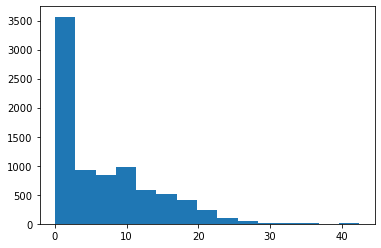

In [43]:
# Plotting the distribution to have a good understanding of the YIELD column
plt.hist(pro_est_df['YIELD (MT/HA)'], bins = 15)
plt.show()

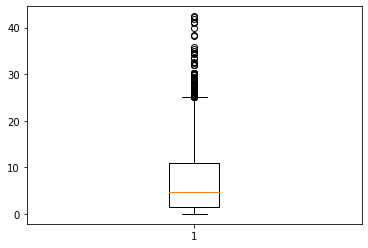

In [44]:
# Plotting the bloxplot to have a good understanding of the YIELD column
plt.boxplot(pro_est_df['YIELD (MT/HA)'])
plt.show()

In [45]:
# Useful parameters
yield_first_quartile = 1.440000
yield_second_quartile = 4.600000
yield_third_quartile = 10.900000
yield_mean = 6.961456
yield_IQR = yield_third_quartile - yield_first_quartile
yield_outlier_range = yield_third_quartile + (1.5 * yield_IQR)
print(yield_outlier_range)

25.090000000000003


In [46]:
# Accessing number of regions with yield below the mean_yield
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] < yield_mean])

4908

In [47]:
# Accessing number of regions with yield below the median_yield
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] < yield_second_quartile])

4113

In [48]:
# Accessing number of regions which are outliers with regards to their yield
len(pro_est_df.loc[pro_est_df['YIELD (MT/HA)'] > yield_outlier_range])

89

We can see 4113 regions which is 49.9% of the whole data have their yield smaller than the median area. Thus, yields of half of the regions are fairly the same or quite smaller. 89 (1.08%) regions have extremely high yields compared to the normal areas. Thus 48% have fairly big yields compared to the regions with smaller yields. These numbers are actually good since more than half of the regions have high yields.

### PRODUCTION Analysis

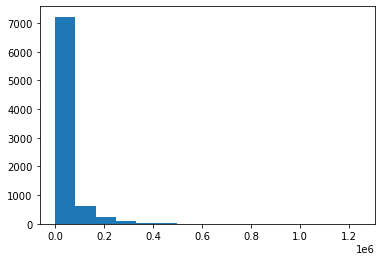

In [49]:
# Plotting the distribution to have a good understanding of the PRODUCTION column
plt.hist(pro_est_df['PRODUCTION (MT)'], bins = 15)
plt.show()

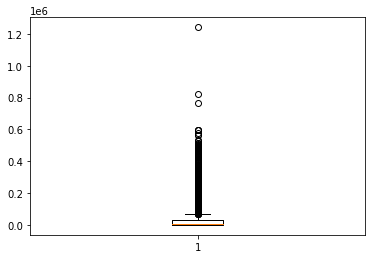

In [50]:
# Plotting the bloxplot to have a good understanding of the PRODUCTION column
plt.boxplot(pro_est_df['PRODUCTION (MT)'])
plt.show()

In [51]:
# Useful parameters
production_first_quartile = 1.782000e+03
production_second_quartile = 7.477235e+03
production_third_quartile = 2.956623e+04
production_mean = 3.265124e+04
production_IQR = production_third_quartile - production_first_quartile
production_outlier_range = production_third_quartile + (1.5 * production_IQR)
print(production_outlier_range)

71242.575


In [52]:
# Accessing number of regions with production below the mean_production
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] < production_mean])

6295

In [53]:
# Accessing number of regions with production below the median_production
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] < production_second_quartile])

4118

In [54]:
""" Accessing number of regions with production below the median_production and 
 above the first_quartile_production """
len((pro_est_df.loc[(pro_est_df['PRODUCTION (MT)'] < production_second_quartile) &
                    (pro_est_df['PRODUCTION (MT)'] > production_first_quartile)]))

2058

In [55]:
# Accessing number of regions which are outliers with regards to their production
len(pro_est_df.loc[pro_est_df['PRODUCTION (MT)'] > production_outlier_range])

1133

In [56]:
pro_est_df.describe()

,YEAR,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
count,8236.000000,8236.000000,8236.000000,8.236000e+03
mean,2012.969888,3996.539373,6.961456,3.265124e+04
std,2.864953,4868.861002,6.576048,6.558999e+04
min,2008.000000,0.020000,0.000000,0.000000e+00
25%,2011.000000,540.000000,1.440000,1.782000e+03
50%,2013.000000,2308.445000,4.600000,7.477235e+03
75%,2016.000000,5860.000000,10.900000,2.956623e+04
max,2017.000000,54300.000000,42.450000,1.241400e+06


We can see 4118 regions which is 50% of the whole data have their production smaller than the median production. Thus, productions of half of the regions are fairly the same or quite smaller. 1138 (13.8%) regions have extremely high productions compared to the normal areas. Thus 36.2% have fairly big productions compared to the regions with smaller yields. 2058 (25%) regions have production values between the first quartile and the median values; this means most regions within this range and the 36.2% above the mdeian value have high productions.  These numbers are not actually good as compared to yield since roughly 40% - 45% of the regions have high yields.



**Yield depends on Production**, but from the data we can see the yield values are more postive than the production values. Comparing the **Production** column to the **Yield** column, regions are actually producing good crops.

## MULTIVARIATE Analysis

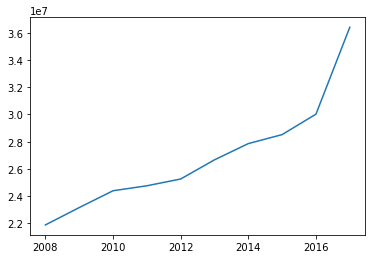

In [57]:
# Plotting YEAR against PRODUCTION
plt.plot(years, pro_est_df.groupby(['YEAR'])['PRODUCTION (MT)'].sum())

We can see production increases with time and our earlier hypothesis was right

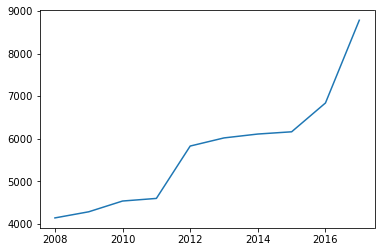

In [58]:
# Plotting YEAR against YIELD
plt.plot(years, pro_est_df.groupby(['YEAR'])['YIELD (MT/HA)'].sum())

We can also see yield increases with time. Thus regions have producing gradually good crops from 2008 till 2017.

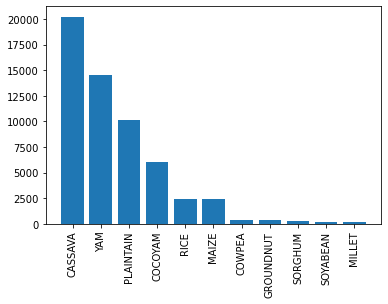

In [70]:
# PLotting Crops against Yield
crops = ['CASSAVA', 'YAM', 'PLAINTAIN', 'COCOYAM', 'RICE', 'MAIZE', 'COWPEA', 'GROUNDNUT',
        'SORGHUM', 'SOYABEAN', 'MILLET']
plt.bar(crops, pro_est_df.groupby(['CROP'])['YIELD (MT/HA)'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)
plt.show()

In [62]:
pro_est_df.columns

Index(['REGION', 'DISTRICT', 'YEAR', 'CROP', 'AREA (HA)', 'YIELD (MT/HA)',
       'PRODUCTION (MT)'],
      dtype='object')

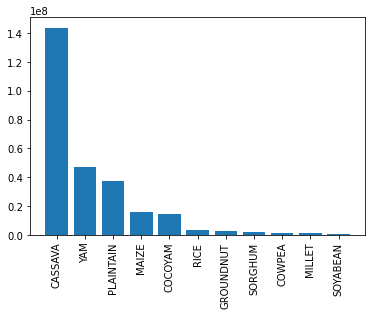

In [59]:
# PLotting Crops against Production
crops = ['CASSAVA', 'YAM', 'PLAINTAIN', 'MAIZE','COCOYAM', 'RICE', 'GROUNDNUT', 'SORGHUM', 'COWPEA',
         'MILLET', 'SOYABEAN', ]
plt.bar(crops, pro_est_df.groupby(['CROP'])['PRODUCTION (MT)'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)
plt.show()

We can see **Cassava, Yam and Plantain** were the most produced. These crops also had the highest yield compared to the others. Also, **Millet and Soyabean** were not produced that much compared to the other crops and as such they had low yields. 

array([<AxesSubplot:ylabel='AREA (HA)'>], dtype=object)

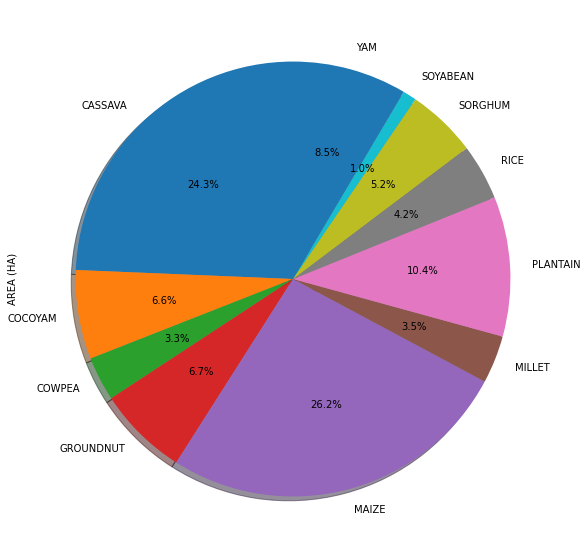

In [71]:
# PLotting Crops against Area
pro_est_df.groupby(['CROP'])['AREA (HA)'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

We can see from the chart that although, **MAIZE** had the largest area for production, the crop did not yield much produce compared to **Cassava, Yam and Plantain** which fell behind **Maize** in terms of area. Clearly, we can see area of land for production has really got nothing to do with Production and Yield. 

C:\Users\JB479JV\AppData\Local\Temp/ipykernel_30868/3666702748.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pro_est_df.groupby(['REGION'])['PRODUCTION (MT)', 'YIELD (MT/HA)'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10),


array([<AxesSubplot:ylabel='PRODUCTION (MT)'>,
       <AxesSubplot:ylabel='YIELD (MT/HA)'>], dtype=object)

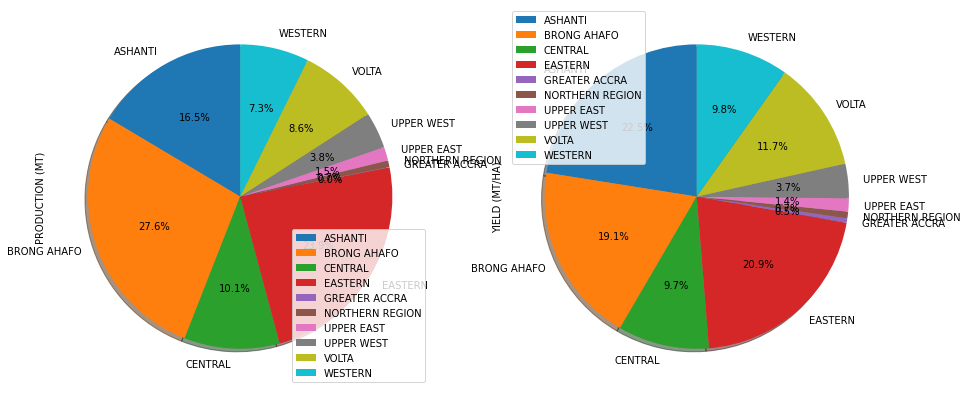

In [72]:
# PLotting Region against Production and Yield
pro_est_df.groupby(['REGION'])['PRODUCTION (MT)', 'YIELD (MT/HA)'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

We can see **Ashanti, Brong Ahafo** and **Eastern** have the highest production and yield. Also **Greater Accra** and **Northern** have the lowest Production and Yield.

In [54]:
# Ranking of YIELD by DISTRICT
pro_est_df.sort_values('YIELD (MT/HA)', ascending =False).head(15)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
8004,ASHANTI,SEKYERE EAST,2017,CASSAVA,3651.00,42.45,154984.95
6645,ASHANTI,SEKYERE EAST,2016,CASSAVA,3566.00,42.35,151029.00
3032,ASHANTI,SEKYERE AFRAM PLAINS,2012,CASSAVA,3194.00,41.82,133573.08
5625,ASHANTI,SEKYERE EAST,2015,CASSAVA,3532.67,41.23,145650.69
4490,ASHANTI,SEKYERE EAST,2014,CASSAVA,3352.00,41.00,137432.00
3622,ASHANTI,SEKYERE EAST,2013,CASSAVA,3250.00,40.00,130000.00
7589,EASTERN,ATIWA,2017,CASSAVA,8803.00,38.35,337595.05
8147,GREATER ACCRA,NINGO-PRAMPRAM DISTRICT ASSEMBLY,2017,CASSAVA,148.00,38.20,5653.60
2801,CENTRAL,ASSIN SOUTH,2012,CASSAVA,3472.00,35.85,124471.20
6496,EASTERN,ATIWA,2016,CASSAVA,8363.91,35.40,296091.93


Above the ranking of **Yield by District** in descending order. Suprising, there is a district, _NINGO-PRAMPRAM DISTRICT ASSEMBLY_ from Greater Accra (which is one of the lowest yielding regions) producing a very high yield. We definitely need to check out the factors causing this and use it to our advantage in the field.

In [55]:
# Ranking of YIELD by DISTRICT
pro_est_df.loc[(pro_est_df['YIELD (MT/HA)'] != 0)].sort_values('YIELD (MT/HA)', ascending =False).tail(15)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
4767,UPPER EAST,BOLGATANGA MUNICIPAL,2014,SOYABEAN,308.00,0.34,104.72
2582,ASHANTI,EJURA SEKYEREDUMASE,2011,COWPEA,6060.00,0.32,1939.20
8124,ASHANTI,BOSUMTWE,2017,COWPEA,63.00,0.32,20.16
5769,UPPER EAST,BOLGATANGA MUNICIPAL,2015,SOYABEAN,305.15,0.32,98.04
3899,UPPER EAST,BOLGATANGA MUNICIPAL,2013,SOYABEAN,381.00,0.30,114.30
3519,UPPER EAST,BOLGATANGA MUNICIPAL,2012,COWPEA,2630.00,0.30,789.00
2588,ASHANTI,BOSUMTWE-ATWIMA-KWANWOMA,2011,COWPEA,70.00,0.30,21.00
5013,ASHANTI,BOSUMTWE,2014,COWPEA,78.00,0.30,23.40
6033,ASHANTI,BOSUMTWE,2015,COWPEA,70.34,0.28,19.79
4319,UPPER EAST,BOLGATANGA MUNICIPAL,2013,COWPEA,1588.00,0.25,397.00


Above the ranking of **Yield by District** in descending order from the bottom. Suprising, there are  districts from Ashanti (which is one of the highest yielding regions) producing low yields. We definitely need to check out the factors causing these and correct them.

In [56]:
# Ranking of PRODUCTION by DISTRICT
pro_est_df.sort_values('PRODUCTION (MT)', ascending =False).head(15)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
7724,CENTRAL,UPPER DENKYIRA WEST,2017,CASSAVA,5456.00,19.50,1241400.00
7726,CENTRAL,ASSIN SOUTH,2017,CASSAVA,4856.00,33.40,820359.54
7727,CENTRAL,ASSIN NORTH,2017,CASSAVA,7457.00,25.60,767827.20
6525,EASTERN,AFRAM PLAINS,2016,YAM,26135.79,22.91,598830.94
5560,EASTERN,AFRAM PLAINS,2015,YAM,26056.41,22.93,597358.80
2195,VOLTA,NKWANTA,2011,CASSAVA,32122.00,18.57,596640.45
4742,EASTERN,AFRAM PLAINS,2014,YAM,25776.00,22.50,579960.00
1492,VOLTA,NKWANTA,2010,CASSAVA,31020.00,18.21,564874.20
837,VOLTA,NKWANTA,2009,CASSAVA,31000.00,18.19,563890.00
796,EASTERN,AFRAM PLAINS,2009,YAM,26800.00,20.00,536000.00


Above the ranking of **Production by District** in descending order. Everything looks normal.

In [57]:
# Ranking of PRODUCTION by DISTRICT
pro_est_df.loc[(pro_est_df['PRODUCTION (MT)'] != 0)].sort_values('PRODUCTION (MT)', ascending =False).tail(15)

,REGION,DISTRICT,YEAR,CROP,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
7690,EASTERN,KWAHU SOUTH,2017,COWPEA,15.00,1.00,15.00
6886,BRONG AHAFO,ATEBUBU -AMANTIN,2016,PLANTAIN,15.00,1.00,15.00
8157,GREATER ACCRA,GA CENTRAL,2017,CASSAVA,1.00,15.00,15.00
5954,EASTERN,KWAHU SOUTH,2015,COWPEA,14.45,0.97,13.98
6078,BRONG AHAFO,ATEBUBU -AMANTIN,2015,PLANTAIN,11.68,0.98,11.44
5058,BRONG AHAFO,ATEBUBU -AMANTIN,2014,PLANTAIN,11.52,0.95,11.00
245,ASHANTI,KUMASI METROPOLITAN ASSEMBLY,2008,RICE,10.00,1.00,10.00
4143,ASHANTI,SEKYERE EAST,2013,COWPEA,20.00,0.50,10.00
4194,BRONG AHAFO,ATEBUBU -AMANTIN,2013,PLANTAIN,11.00,0.83,9.13
3477,BRONG AHAFO,ATEBUBU -AMANTIN,2012,PLANTAIN,10.50,0.81,8.51


Above the ranking of **Production by District** in descending order from the bottom. Suprising, there are  districts from Ashanti, Brong Ahafo and Eastern (which are the highest yielding regions) producing low yields. We definitely need to check out the factors causing these and correct them.

In [58]:
# Plotting correlation of numerical columns
corr = pro_est_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,YEAR,AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
YEAR,1.000000,-0.115683,0.059953,-0.013695
AREA (HA),-0.115683,1.000000,0.140375,0.574871
YIELD (MT/HA),0.059953,0.140375,1.000000,0.652473
PRODUCTION (MT),-0.013695,0.574871,0.652473,1.000000


We can see all columns have a high correlation except Year with a very low correlation. This information is being supported by the Profile Report shown above.

# Rainfall DataFrame Analysis

In [59]:
# Accessing the Rainfall df
rainfall_df.head(3)

,YEAR,REGION,TOTAL RAINFALL(MM)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914


In [60]:
# Checking for null values
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YEAR                100 non-null    int64 
 1   REGION              100 non-null    object
 2   TOTAL RAINFALL(MM)  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [61]:
# Accessing the Rainfall df column names
rainfall_df.columns

Index(['YEAR', 'REGION', 'TOTAL RAINFALL(MM)'], dtype='object')

In [62]:
# Accessing the Profile Report of the Rainfall df
pp.ProfileReport(rainfall_df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
# Accessing the statistical information of the Rainfall df
rainfall_df.describe()

,YEAR,TOTAL RAINFALL(MM)
count,100.000000,100.000000
mean,2012.500000,1084.200000
std,2.886751,305.835501
min,2008.000000,300.000000
25%,2010.000000,880.750000
50%,2012.500000,1081.500000
75%,2015.000000,1293.500000
max,2017.000000,1814.000000


Since we already have a high correlation between **Region and Rainfall** and also **Year and Rainfall** as shown the Profile Report,we will keep all the columns. We will merge this dataset with the Production Estimate dataframe later for the machine learning model. Also, since we already have the statistics as given by the describe method, we will skip the Univariate analysis and move straight to the Multivariate analysis of this Rainfall dataset.

## MULTIVARIATE Analysis

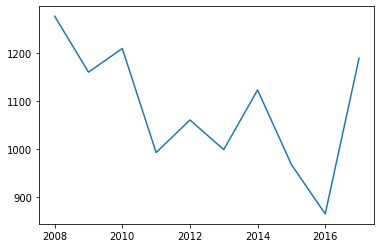

In [64]:
# Plotting YEAR against mean of TOTAL RAINFALL 
plt.plot(years, rainfall_df.groupby(['YEAR'])['TOTAL RAINFALL(MM)'].mean())

There is a sharp decline in **Average rainfall** followed by a sharp rise in 2017. This however did not affect **Production** and **Yield** as we saw above that Production and Yield increased gradually with time.

array([<AxesSubplot:ylabel='TOTAL RAINFALL(MM)'>], dtype=object)

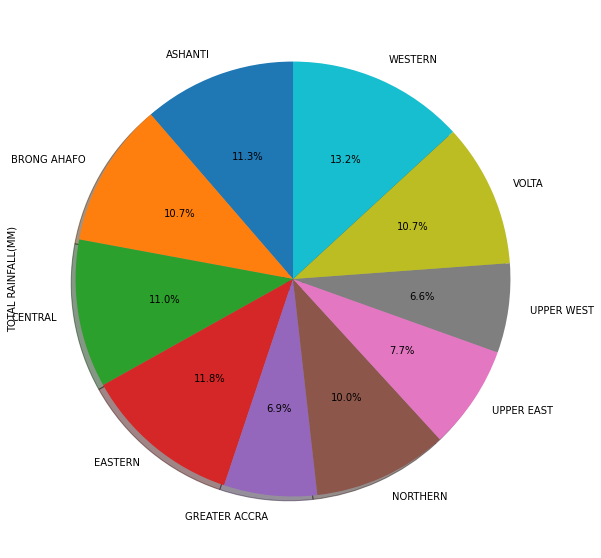

In [65]:
# Plotting YEAR against mean of TOTAL RAINFALL
rainfall_df.groupby(['REGION'])['TOTAL RAINFALL(MM)'].mean().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')

Almost all regions have the same Average Rainfall with a few dropping low to about 7%. **Ashanti, Brong Ahafo and Eastern** all have higher percentages with regards to Average Rainfall, and that is expected as they have high **Production and Yield** values. Interesting, **Northern** has a high Average Rainfall percentage, yet produces low **Production and Yield** values.

# NATIONWIDE PRICES DataFrame Analysis

In [66]:
# Accessing the NationWide_Prices df
ws_price_df.head(3)

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043


In [67]:
# Checking for null values
ws_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


In [68]:
# Accessing the NationWide_Prices df column names
ws_price_df.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

The _PRICE, ¢ GH_ column name has a whitespace infront of it, so we will rename it to correct that error.

In [69]:
# Renaming PRICE column as mentioned above
ws_price_df.columns = ['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', 'PRICE, ¢ GH']

In [70]:
# Accessing the Profile Report of the NationWide_Prices df
pp.ProfileReport(ws_price_df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
# Accessing the statistical information of the NationWide_Prices df
ws_price_df.describe()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
count,720.000000,720.000000,720.000000
mean,2012.491667,123.833333,113.982091
std,2.871361,56.759258,162.115749
min,2008.000000,91.000000,0.007000
25%,2010.000000,93.000000,15.141000
50%,2012.500000,100.000000,52.390000
75%,2015.000000,109.000000,140.122500
max,2017.000000,250.000000,920.550000


## UNIVARIATE Analysis

### COMMODITY Analysis

In [72]:
# Accessing COMMODITY value counts
ws_price_df.COMMODITY.value_counts()

MAIZE         120
MILLET        120
LOCAL RICE    120
SORGHUM       120
YAM           120
COCOYAM       120
Name: COMMODITY, dtype: int64

The NationWide_Prices df has less the number of crops in the COMMODITY column as compared to the CROPS column in the PRODUCTION ESTIMATES df.

### YEAR Analysis

In [73]:
# Accessing YEAR value counts
ws_price_df.YEAR.value_counts()

2013    78
2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
2014    66
Name: YEAR, dtype: int64

In [74]:
# Checking for irregularities
ws_price_df.loc[ws_price_df['YEAR'] == 2013].head(20)

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
60,2013,JANUARY,MAIZE,100,33.436
61,2013,FEBRUARY,MAIZE,100,34.731
62,2013,MARCH,MAIZE,100,35.125
63,2013,APRIL,MAIZE,100,34.793
64,2013,MAY,MAIZE,100,36.110
65,2013,JUNE,MAIZE,100,42.802
66,2013,JULY,MAIZE,100,44.508
67,2013,AUGUST,MAIZE,100,47.169
68,2013,SEPTEMBER,MAIZE,100,46.624
69,2013,OCTOBER,MAIZE,100,50.594


We can see January repeats itself for the 2013 year, as such accounting 78 counts instead of 72 counts ( _6 products * 12 months = 72 counts_ ). The NationWide_Prices df has less the number of crops in the COMMODITY column as compared to the CROPS column in the PRODUCTION ESTIMATES df as already mentioned. As such, we will not use it for our machine learning model. 

So, we will correct this error and continue with the analysis since we need the insights from this data set.


To correct this error, we will drop the 2013 and 2014 data totally, and recreate them using the 2015 as our template, thus we will copy the 2015 data and replace the year with 2013 and 2014 in two different data frames. After that then we concatente these two data frames with the old dataframe.

In [75]:
# Dropping 2013 and 2014
ws_price_df = ws_price_df.loc[(ws_price_df['YEAR'] != 2013) & (ws_price_df['YEAR'] != 2014)]

In [76]:
# Checking if 2013 and 2014 have been dropped
ws_price_df.YEAR.value_counts()

2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
Name: YEAR, dtype: int64

In [77]:
# Doing replacements
year_2013 = ws_price_df.loc[ws_price_df['YEAR'] == 2015].replace(2015, 2013)
year_2014 = ws_price_df.loc[ws_price_df['YEAR'] == 2015].replace(2015, 2014)

In [78]:
# Doing concatenation
ws_price_df = pd.concat([ws_price_df, year_2013, year_2014]).sort_values('YEAR')
ws_price_df

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
362,2008,MARCH,SORGHUM,109,476.452
363,2008,APRIL,SORGHUM,109,563.877
364,2008,MAY,SORGHUM,109,624.502
365,2008,JUNE,SORGHUM,109,689.870
...,...,...,...,...,...
469,2017,FEBRUARY,SORGHUM,109,0.020
470,2017,MARCH,SORGHUM,109,0.020
471,2017,APRIL,SORGHUM,109,0.020
351,2017,APRIL,LOCAL RICE,100,214.273


In [79]:
# Rechecking if correction has been done
ws_price_df.YEAR.value_counts()

2008    72
2009    72
2010    72
2011    72
2012    72
2013    72
2014    72
2015    72
2016    72
2017    72
Name: YEAR, dtype: int64

Indeed, correction has been done !

### WEIGHT Analysis

In [81]:
# Accessing weight value counts
ws_price_df['WEIGHT, KG PER BAG'].value_counts()

100    240
109    120
250    120
93     120
91     120
Name: WEIGHT, KG PER BAG, dtype: int64

### PRICES Analysis

(array([368., 127.,  73.,  50.,  21.,  12.,  18.,  11.,  13.,   7.,   9.,
          5.,   1.,   1.,   4.]),
 array([7.00000000e-03, 6.13765333e+01, 1.22746067e+02, 1.84115600e+02,
        2.45485133e+02, 3.06854667e+02, 3.68224200e+02, 4.29593733e+02,
        4.90963267e+02, 5.52332800e+02, 6.13702333e+02, 6.75071867e+02,
        7.36441400e+02, 7.97810933e+02, 8.59180467e+02, 9.20550000e+02]),
 <BarContainer object of 15 artists>)

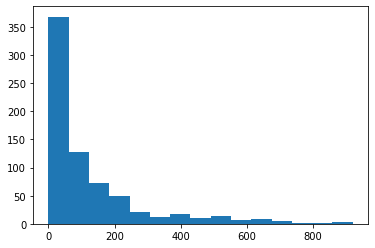

In [80]:
# PLotting histogram of Prices
plt.hist(ws_price_df['PRICE, ¢ GH'], bins = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x25b645d3c48>,
 'caps': [<matplotlib.lines.Line2D at 0x25b645d3188>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b64468288>],
 'medians': [<matplotlib.lines.Line2D at 0x25b64468e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b645d32c8>],
 'means': []}

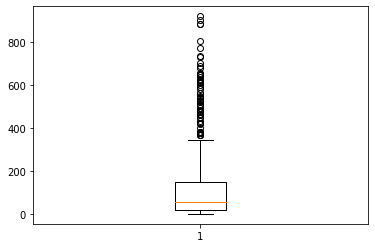

In [82]:
# PLotting BOXPLOT of Prices
plt.boxplot(ws_price_df['PRICE, ¢ GH'])

In [83]:
# Useful parameters
price_first_quartile = 15.141000
price_second_quartile = 52.390000
price_third_quartile = 140.122500
price_mean = 140.122500
price_IQR = price_third_quartile - price_first_quartile
price_outlier_range = price_third_quartile + (1.5 * price_IQR)
print(price_outlier_range)

327.59475


In [84]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] < price_mean])

527

In [85]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] < price_second_quartile])

352

In [92]:
len(ws_price_df.loc[ws_price_df['PRICE, ¢ GH'] > price_outlier_range])

75

We can see 352 commodities which is is 48.9 % of the whole data with prices lesser than the median area. Thus, prices of less than half of the commodities are low. The 52% are higher than the median price, as such prices of commodities are generally high.

## MULTIVARIATE Analysis

In [87]:
ws_price_df.groupby(['YEAR'])['COMMODITY','PRICE, ¢ GH'].max()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,YAM,689.87
2009,YAM,920.55
2010,YAM,884.20
2011,YAM,202.10
2012,YAM,280.46
2013,YAM,378.35
2014,YAM,378.35
2015,YAM,378.35
2016,YAM,524.89


In [88]:
ws_price_df.groupby(['YEAR'])['COMMODITY','PRICE, ¢ GH'].min()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,COCOYAM,0.131
2009,COCOYAM,3.317
2010,COCOYAM,4.382
2011,COCOYAM,0.007
2012,COCOYAM,0.010
2013,COCOYAM,0.010
2014,COCOYAM,0.010
2015,COCOYAM,0.010
2016,COCOYAM,0.010


We can above that **YAM** has the highest prices across all years and **COCOYAM** has the lowest prices across all years.

In [89]:
ws_price_df.groupby(['YEAR'])['MONTH','PRICE, ¢ GH'].max()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MONTH,"PRICE, ¢ GH"
YEAR,,
2008,SEPTEMBER,689.87
2009,SEPTEMBER,920.55
2010,SEPTEMBER,884.20
2011,SEPTEMBER,202.10
2012,SEPTEMBER,280.46
2013,SEPTEMBER,378.35
2014,SEPTEMBER,378.35
2015,SEPTEMBER,378.35
2016,SEPTEMBER,524.89


In [90]:
ws_price_df.groupby(['YEAR'])['MONTH','PRICE, ¢ GH'].min()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MONTH,"PRICE, ¢ GH"
YEAR,,
2008,APRIL,0.131
2009,APRIL,3.317
2010,APRIL,4.382
2011,APRIL,0.007
2012,APRIL,0.010
2013,APRIL,0.010
2014,APRIL,0.010
2015,APRIL,0.010
2016,APRIL,0.010


**SEPTEMBER** is the month with the highest prices across all years and **APRIL** is the month with the lowest prices across all years.

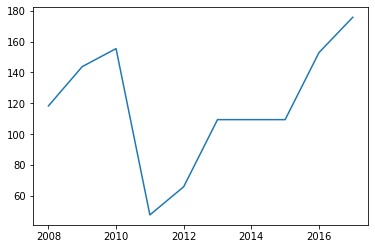

In [91]:
plt.plot(years, ws_price_df.groupby(['YEAR'])['PRICE, ¢ GH'].mean())

As we can we see, prices of commodities dropped drastically in 2011, but it has started increasing gradually from then till now.

In [93]:
corr = ws_price_df.corr()
corr.style.background_gradient()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
YEAR,1.000000,-0.000000,0.061601
"WEIGHT, KG PER BAG",-0.000000,1.000000,0.420618
"PRICE, ¢ GH",0.061601,0.420618,1.000000


Again, all columns have a high correlation except **YEAR** as supported by our Profile Report graph above.

# DEEP LEARNING MODEL



From the above analysis, we can see a high correlation between all columns of the Production Estimate dataset except **District** and **Year**, so we drop will them. Also, in the Rainfall dataset, **Year** has a low correlation, as such we will drop it.

We will not use the National Price dataset since the Commodity column has less the number of crops in the Production Estimate dataset; we are avoiding it so as not to get null values for crops without prices when merged with the Production Estimate dataset.

There are unique rainfall values for each year and month within the Rainfall Dataset. As such we have combined the Rainfall dataset within excel and we will load it for our machine learning model. As seen in at the beginning of the Analysis, at times **Production** and **Yield** are not recorded; as such we will predict only yield. Yield can be calculated from Production by dividing it by Area so no need to predict Production.

In [94]:
data = pd.read_excel('ecomdata.xlsx')
data.head()

,REGION,DISTRICT,YEAR,CROP,TOTAL RAINFALL(MM),AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,WESTERN,SHAMA AHANTA EAST,2008,MAIZE,1518,1099.0,1.15,1263.85
1,WESTERN,WEST AHANTA,2008,MAIZE,1518,1433.0,1.19,1705.27
2,WESTERN,MPORHOR WASSA EAST,2008,MAIZE,1518,2034.0,1.32,2684.88
3,WESTERN,WASSA WEST,2008,MAIZE,1518,2204.0,1.20,2644.80
4,WESTERN,EAST NZEMA,2008,MAIZE,1518,1550.0,1.38,2139.00


In [95]:
data.columns

Index(['REGION', 'DISTRICT', 'YEAR', 'CROP', 'TOTAL RAINFALL(MM)', 'AREA (HA)',
       'YIELD (MT/HA)', 'PRODUCTION (MT)'],
      dtype='object')

In [96]:
data = data.drop(['DISTRICT', 'YEAR'], axis = 1)

In [98]:
data.head(3)

,REGION,CROP,TOTAL RAINFALL(MM),AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,WESTERN,MAIZE,1518,1099.0,1.15,1263.85
1,WESTERN,MAIZE,1518,1433.0,1.19,1705.27
2,WESTERN,MAIZE,1518,2034.0,1.32,2684.88


We will encode the categorical data specifically the **REGION** and **CROP** columns with with numerical values for our deep learning

In [99]:
cleanup_cats = {"CROP": {"RICE ": 'RICE', "MAIZE ": "MAIZE"}}
data = data.replace(cleanup_cats)

In [100]:
data.REGION.value_counts()

ASHANTI            1635
BRONG AHAFO        1254
EASTERN            1203
WESTERN             971
VOLTA               965
CENTRAL             756
UPPER WEST          707
UPPER EAST          637
NORTHERN REGION      78
GREATER ACCRA        30
Name: REGION, dtype: int64

In [101]:
data.CROP.value_counts()

MAIZE        1369
CASSAVA      1184
YAM          1133
RICE         1065
PLANTAIN     1061
COCOYAM       994
COWPEA        434
GROUNDNUT     344
SORGHUM       262
SOYABEAN      208
MILLET        182
Name: CROP, dtype: int64

In [102]:
cleanup_nums = {"REGION": {"ASHANTI": 0, "BRONG AHAFO": 1, "EASTERN": 2, "WESTERN": 3,
                              "VOLTA": 4, "CENTRAL": 5, "UPPER WEST": 6, "UPPER EAST": 7,
                              "NORTHERN REGION": 8, "GREATER ACCRA": 9},
                "CROP": {"MAIZE": 0, "CASSAVA": 1, "YAM": 2, "RICE": 3,
                              "PLANTAIN": 4, "COCOYAM": 5, "COWPEA": 6, "GROUNDNUT": 7,
                              "SORGHUM": 8, "SOYABEAN": 9, "MILLET": 9}}
data = data.replace(cleanup_nums)

In [103]:
data.CROP.value_counts()

0    1369
1    1184
2    1133
3    1065
4    1061
5     994
6     434
9     390
7     344
8     262
Name: CROP, dtype: int64

In [104]:
data.REGION.value_counts()

0    1635
1    1254
2    1203
3     971
4     965
5     756
6     707
7     637
8      78
9      30
Name: REGION, dtype: int64

In [106]:
data.head(3)

,REGION,CROP,TOTAL RAINFALL(MM),AREA (HA),YIELD (MT/HA),PRODUCTION (MT)
0,3,0,1518,1099.0,1.15,1263.85
1,3,0,1518,1433.0,1.19,1705.27
2,3,0,1518,2034.0,1.32,2684.88


In [107]:
train_data = data[5:]

In [108]:
test = data[:5]

In [109]:
X = train_data[['REGION', 'CROP', 'TOTAL RAINFALL(MM)', 'AREA (HA)']]
y = train_data['YIELD (MT/HA)']

In [110]:
# Normalizing the data set
scaler = StandardScaler(with_mean=False, with_std=False)
scaler.fit(X)

StandardScaler(with_mean=False, with_std=False)

In [111]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2 , random_state = 3)

In [112]:
reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, subsample=1.0, criterion='mse', 
                                min_samples_split=56, min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_depth=8,
                                min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, 
                                max_features=None, alpha=0.5, verbose=0, max_leaf_nodes=None, 
                                warm_start=False,validation_fraction=0.1, n_iter_no_change=None, 
                                tol=0.01, ccp_alpha=0.0)

In [113]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.5, criterion='mse', max_depth=8,
                          min_samples_leaf=4, min_samples_split=56,
                          n_estimators=50, tol=0.01)

In [114]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3.8966


Our model has a mean squared error of 3.8 which is quite good

#### Prediction

In [115]:
# predicted yield values
reg.predict(test.drop(['YIELD (MT/HA)', 'PRODUCTION (MT)'], axis = 1))

array([1.19519202, 1.23206197, 1.82601517, 1.78979033, 1.2303723 ])

In [116]:
# real yield values
test['YIELD (MT/HA)'].values

array([1.15, 1.19, 1.32, 1.2 , 1.38])